# 1

In [ ]:
import numpy as np, matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
data = np.loadtxt("/content/sample_data/fish.txt")

Mounted at /content/drive


In [ ]:

logL = np.log(L)
logM = np.log(M)

X = logL
Y = logM

X_mean = np.mean(X)
Y_mean = np.mean(Y)
XY_mean = np.mean(X*Y)
X_squared_mean = np.mean(X**2)


b = (XY_mean - X_mean*Y_mean) / (X_squared_mean - X_mean**2)
a = Y_mean - b*X_mean

a, b

(-12.28937227760549, 3.1389748480437674)

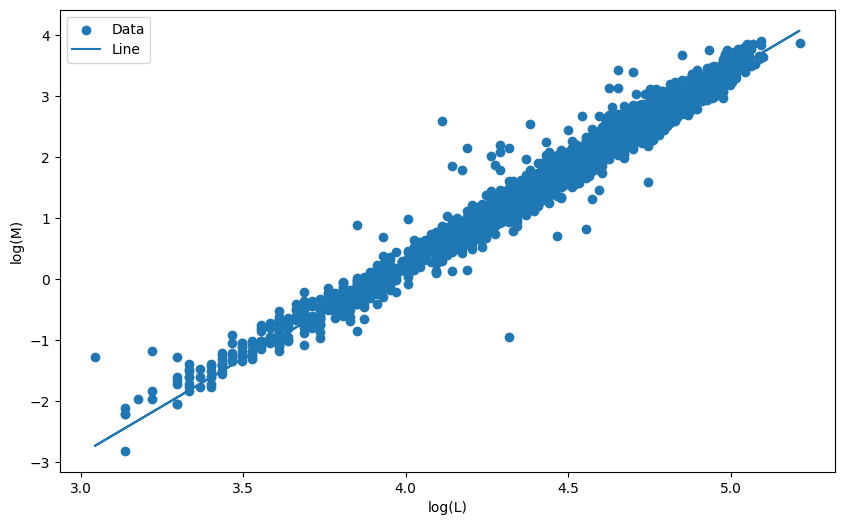

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(logL, logM, label='Data')

predicted_logM = b * logL + a
plt.plot(logL, predicted_logM, label='Line')


plt.xlabel('log(L)')
plt.ylabel('log(M)')
plt.legend()

plt.show()

# 2

In [ ]:

a, b=-12.2, 3.1
c = 0.01
iterations = 1000
n = len(data)

for _ in range(iterations):

    Y_pred = b * X + a

    D_a = (-2/n) * sum(Y - Y_pred)
    D_b = (-2/n) * sum(X * (Y - Y_pred))

    a -= c * D_a
    b -= c * D_b

a,b

(-12.206135839732505, 3.1202546704568324)

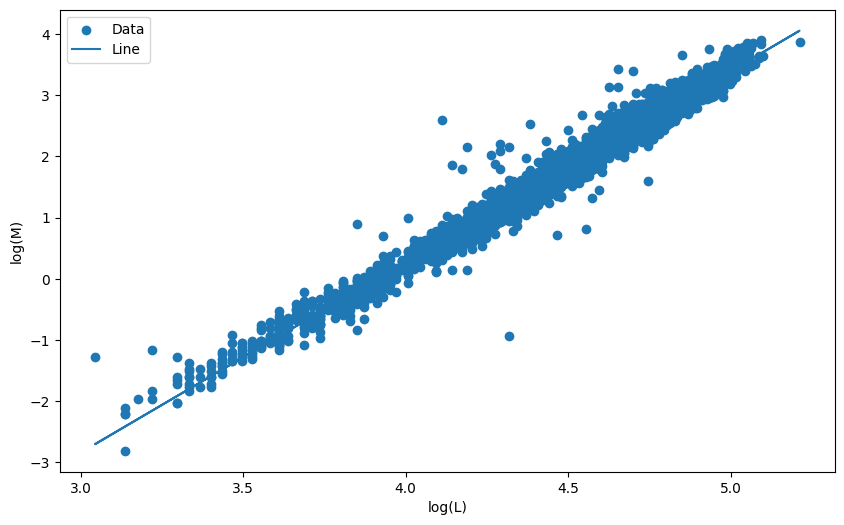

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(logL, logM, label='Data')

predicted_logM = b * logL + a
plt.plot(logL, predicted_logM, label='Line')


plt.xlabel('log(L)')
plt.ylabel('log(M)')
plt.legend()

plt.show()

In [ ]:
a, b = -12.2, 3.1

def approximate_gradients(a, b, X, Y, h=0.001):

    E_a = sum((Y - (b * X + a))**2)
    E_a_h = sum((Y - (b * X + (a + h)))**2)
    D_a = (E_a_h - E_a) / h

    E_b = sum((Y - (b * X + a))**2)
    E_b_h = sum((Y - ((b + h) * X + a))**2)
    D_b = (E_b_h - E_b) / h

    return D_a, D_b

for _ in range(iterations):
    D_a, D_b = approximate_gradients(a, b, X, Y)
    a -= c  * D_a
    b -= c * D_b

a, b

(13732450549389.193, 67981396028611.336)

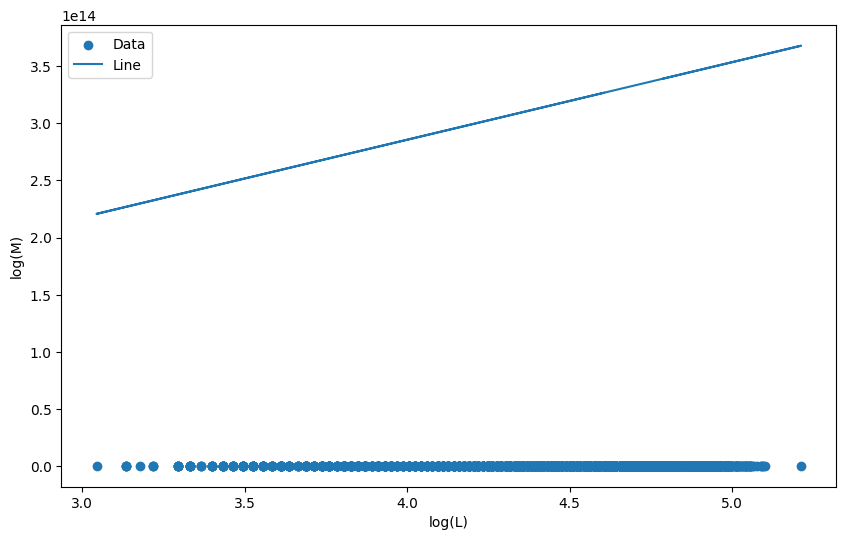

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(logL, logM, label='Data')

predicted_logM = b * logL + a
plt.plot(logL, predicted_logM, label='Line')


plt.xlabel('log(L)')
plt.ylabel('log(M)')
plt.legend()

plt.show()

# 3

## 3-1

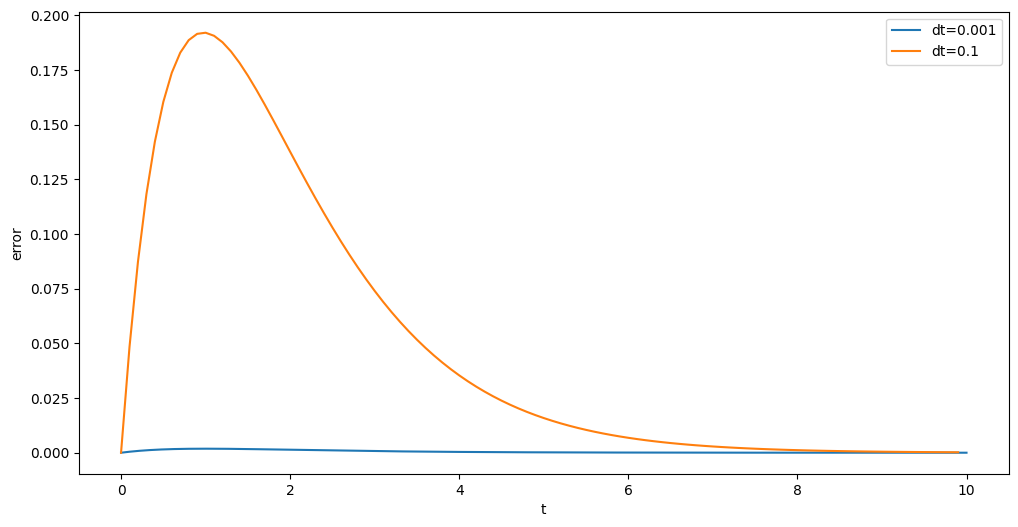

In [ ]:

g = 10.0
gamma = 1.0
maxt = 10.0

def plot_error(dt):
    t_arr = np.arange(0, maxt, dt)
    v_arr = np.zeros(len(t_arr))
    v = 0.0

    for i, t in enumerate(t_arr[:-1]):
        v += dt * (g - gamma * v)
        v_arr[i+1] = v

    exact_v = g / gamma * (1. - np.exp(-gamma * t_arr))

    error = np.abs(v_arr - exact_v)

    plt.plot(t_arr, error, label=f'dt={dt}')

plt.figure(figsize=(12, 6))
plot_error(0.001)
plot_error(0.1)
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()


## 3-2

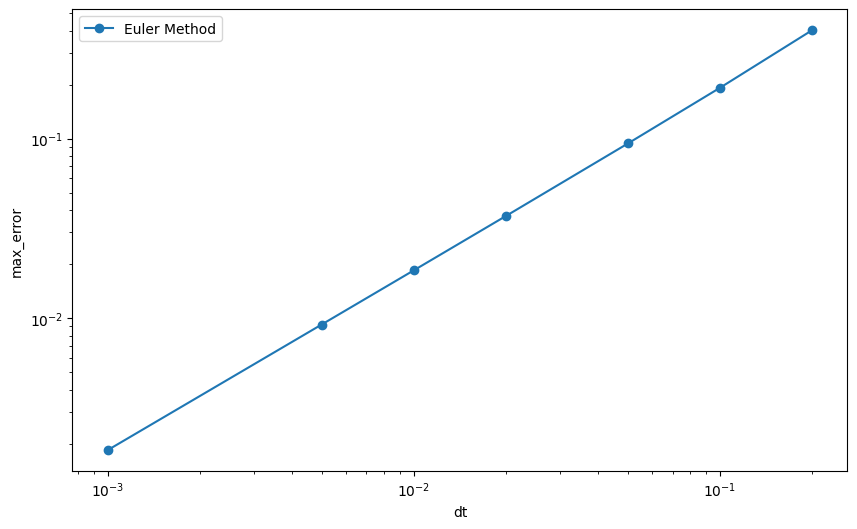

In [ ]:

dt_values = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
max_errors = []

for dt in dt_values:
    t_arr = np.arange(0, maxt, dt)
    v_arr = np.zeros(len(t_arr))
    v = 0.0

    for i, t in enumerate(t_arr[:-1]):
        v += dt * (g - gamma * v)
        v_arr[i+1] = v

    exact_v = g / gamma * (1. - np.exp(-gamma * t_arr))

    max_error = np.max(np.abs(v_arr - exact_v))
    max_errors.append(max_error)

plt.figure(figsize=(10, 6))
plt.plot(dt_values, max_errors, 'o-', label='Euler Method')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dt')
plt.ylabel('max_error')
plt.legend()
plt.show()

## 3-3

Euler Method
Modified Euler Method
RK2
RK4


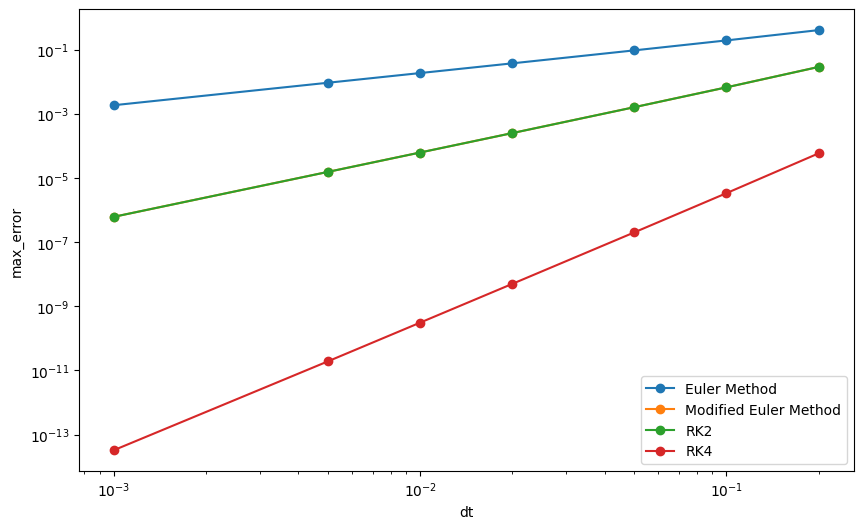

In [ ]:
dt_values = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
max_errors = []
def euler_method(dt, t_arr):
    v_arr = np.zeros(len(t_arr))
    v = 0.0
    for i, t in enumerate(t_arr[:-1]):
        v += dt * (g - gamma * v)
        v_arr[i+1] = v
    return v_arr

def modified_euler_method(dt, t_arr):
    v_arr = np.zeros(len(t_arr))
    v = 0.0
    for i, t in enumerate(t_arr[:-1]):
        v_mid = v + dt/2 * (g - gamma * v)
        v += dt * (g - gamma * v_mid)
        v_arr[i+1] = v
    return v_arr

def rk2_method(dt, t_arr):
    v_arr = np.zeros(len(t_arr))
    v = 0.0
    for i, t in enumerate(t_arr[:-1]):
        k1 = dt * (g - gamma * v)
        k2 = dt * (g - gamma * (v + k1))
        v += (k1 + k2) / 2
        v_arr[i+1] = v
    return v_arr

def rk4_method(dt, t_arr):
    v_arr = np.zeros(len(t_arr))
    v = 0.0
    for i, t in enumerate(t_arr[:-1]):
        k1 = dt * (g - gamma * v)
        k2 = dt * (g - gamma * (v + k1/2))
        k3 = dt * (g - gamma * (v + k2/2))
        k4 = dt * (g - gamma * (v + k3))
        v += (k1 + 2*k2 + 2*k3 + k4) / 6
        v_arr[i+1] = v
    return v_arr

methods = [euler_method, modified_euler_method, rk2_method, rk4_method]
method_labels = ['Euler Method', 'Modified Euler Method', 'RK2', 'RK4']
max_errors_methods = {label: [] for label in method_labels}

for dt in dt_values:
    t_arr = np.arange(0, maxt, dt)
    exact_v = g / gamma * (1. - np.exp(-gamma * t_arr))
    for method, label in zip(methods, method_labels):
        v_arr = method(dt, t_arr)
        max_error = np.max(np.abs(v_arr - exact_v))
        max_errors_methods[label].append(max_error)


plt.figure(figsize=(10, 6))
for label in method_labels:
    plt.plot(dt_values, max_errors_methods[label], 'o-', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('dt')
plt.ylabel('max_error')
plt.legend()
plt.show()


# 4

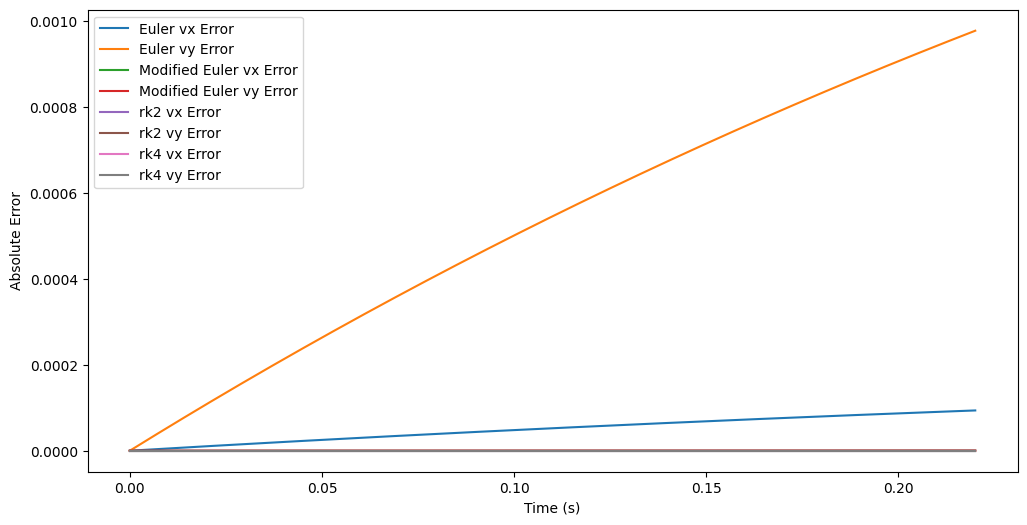

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 1.5
theta = np.pi / 4
g = 10.0
gamma = 1.0
tf = 0.22


def euler_method(v0, theta, g, gamma, tf, dt):

    n = int(tf / dt) + 1
    vx = np.zeros(n)
    vy = np.zeros(n)
    t = np.linspace(0, tf, n)

    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    for i in range(n - 1):
        vx[i + 1] = vx[i] - gamma * vx[i] * dt
        vy[i + 1] = vy[i] - (g + gamma * vy[i]) * dt

    return t, vx, vy


def modified_euler_method(v0, theta, g, gamma, tf, dt):

    n = int(tf / dt) + 1
    vx = np.zeros(n)
    vy = np.zeros(n)
    t = np.linspace(0, tf, n)

    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    for i in range(n - 1):
        vx_mid = vx[i] - gamma * vx[i] * dt / 2
        vy_mid = vy[i] - (g + gamma * vy[i]) * dt / 2
        vx[i + 1] = vx[i] - gamma * vx_mid * dt
        vy[i + 1] = vy[i] - (g + gamma * vy_mid) * dt

    return t, vx, vy


def rk2_method(v0, theta, g, gamma, tf, dt):
    n = int(tf / dt) + 1
    vx = np.zeros(n)
    vy = np.zeros(n)
    t = np.linspace(0, tf, n)

    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    for i in range(n - 1):
        k1x = -gamma * vx[i]
        k1y = -g - gamma * vy[i]

        k2x = -gamma * (vx[i] + k1x * dt / 2)
        k2y = -g - gamma * (vy[i] + k1y * dt / 2)

        vx[i + 1] = vx[i] + k2x * dt
        vy[i + 1] = vy[i] + k2y * dt

    return t, vx, vy

def rk4_method(v0, theta, g, gamma, tf, dt):
    n = int(tf / dt) + 1
    vx = np.zeros(n)
    vy = np.zeros(n)
    t = np.linspace(0, tf, n)

    vx[0] = v0 * np.cos(theta)
    vy[0] = v0 * np.sin(theta)

    for i in range(n - 1):
        k1x = -gamma * vx[i]
        k1y = -g - gamma * vy[i]

        k2x = -gamma * (vx[i] + k1x * dt / 2)
        k2y = -g - gamma * (vy[i] + k1y * dt / 2)

        k3x = -gamma * (vx[i] + k2x * dt / 2)
        k3y = -g - gamma * (vy[i] + k2y * dt / 2)

        k4x = -gamma * (vx[i] + k3x * dt)
        k4y = -g - gamma * (vy[i] + k3y * dt)

        vx[i + 1] = vx[i] + (k1x + 2*k2x + 2*k3x + k4x) * dt / 6
        vy[i + 1] = vy[i] + (k1y + 2*k2y + 2*k3y + k4y) * dt / 6

    return t, vx, vy

def theoretical_solution(t, v0, theta, g, gamma):

    vx_theory = v0 * np.cos(theta) * np.exp(-gamma * t)

    vy_theory = v0 * np.sin(theta) * np.exp(-gamma * t) - (g/gamma) * (1 - np.exp(-gamma * t))
    return vx_theory, vy_theory

dt = 0.001
t_euler, vx_euler, vy_euler = euler_method(v0, theta, g, gamma, tf, dt)
t_mod_euler, vx_mod_euler, vy_mod_euler = modified_euler_method(v0, theta, g, gamma, tf, dt)
t_rk2, vx_rk2, vy_rk2 = rk2_method(v0, theta, g, gamma, tf, dt)
t_rk4, vx_rk4, vy_rk4 = rk4_method(v0, theta, g, gamma, tf, dt)

vx_theory, vy_theory = theoretical_solution(t_euler, v0, theta, g, gamma)

plt.figure(figsize=(12, 6))

plt.plot(t_euler, np.abs(vx_euler - vx_theory), label='Euler vx Error')
plt.plot(t_euler, np.abs(vy_euler - vy_theory), label='Euler vy Error')

plt.plot(t_mod_euler, np.abs(vx_mod_euler - vx_theory), label='Modified Euler vx Error')
plt.plot(t_mod_euler, np.abs(vy_mod_euler - vy_theory), label='Modified Euler vy Error')

plt.plot(t_rk2, np.abs(vx_rk2 - vx_theory), label='rk2 vx Error')
plt.plot(t_rk2, np.abs(vy_rk2 - vy_theory), label='rk2 vy Error')

plt.plot(t_rk4, np.abs(vx_rk4 - vx_theory), label='rk4 vx Error')
plt.plot(t_rk4, np.abs(vy_rk4 - vy_theory), label='rk4 vy Error')

plt.xlabel('Time (s)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

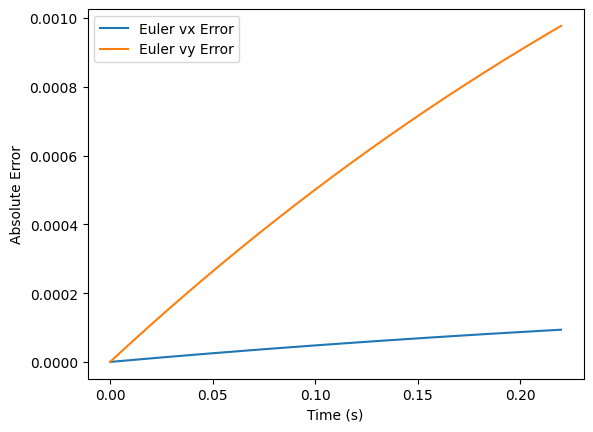

In [ ]:
plt.plot(t_euler, np.abs(vx_euler - vx_theory), label='Euler vx Error')
plt.plot(t_euler, np.abs(vy_euler - vy_theory), label='Euler vy Error')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

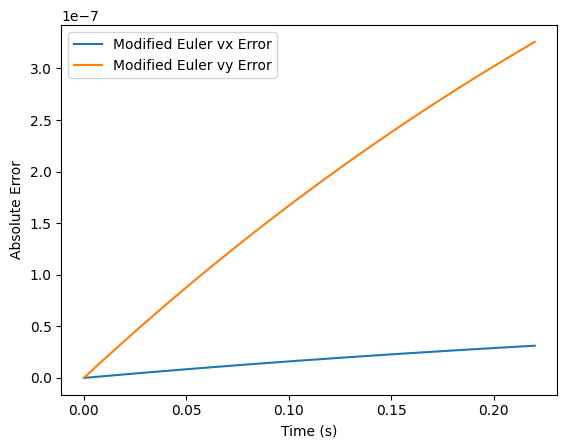

In [ ]:

plt.plot(t_mod_euler, np.abs(vx_mod_euler - vx_theory), label='Modified Euler vx Error')
plt.plot(t_mod_euler, np.abs(vy_mod_euler - vy_theory), label='Modified Euler vy Error')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

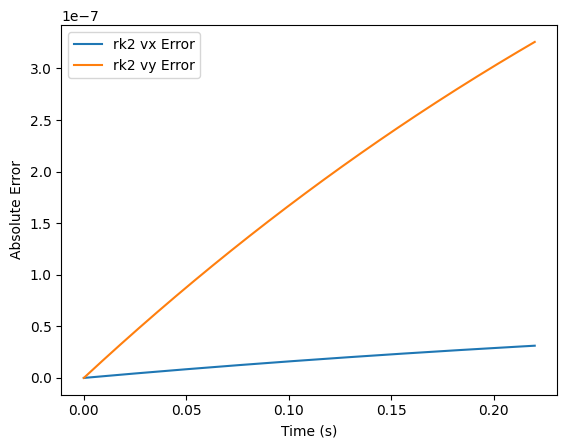

In [ ]:
plt.plot(t_rk2, np.abs(vx_rk2 - vx_theory), label='rk2 vx Error')
plt.plot(t_rk2, np.abs(vy_rk2 - vy_theory), label='rk2 vy Error')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

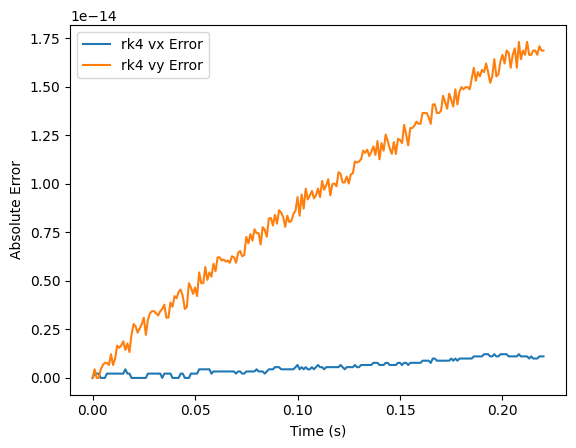

In [ ]:

plt.plot(t_rk4, np.abs(vx_rk4 - vx_theory), label='rk4 vx Error')
plt.plot(t_rk4, np.abs(vy_rk4 - vy_theory), label='rk4 vy Error')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()